<a href="https://colab.research.google.com/github/Soubhagyabehera/CNN/blob/master/Image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
import random 
import cv2
import seaborn as sms
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical


Using TensorFlow backend.


In [0]:
(x_tr,y_tr),(x_test,y_test)=mnist.load_data()

11493376/11490434 [==============================] - 2s 0us/step


In [0]:
print(x_tr.shape)
print(y_tr.shape)

(60000, 28, 28)
(60000,)


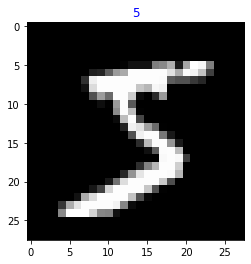

In [0]:
plt.imshow(x_tr[0,:,:],cmap='gray')
plt.title(y_tr[0],color='b')
plt.show()



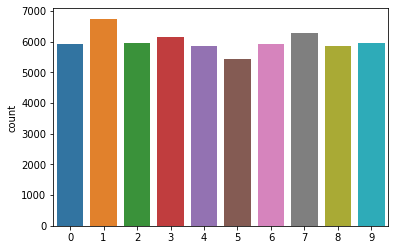

In [0]:
sms.countplot(y_tr)  #counting the number of images for each class...
plt.show()

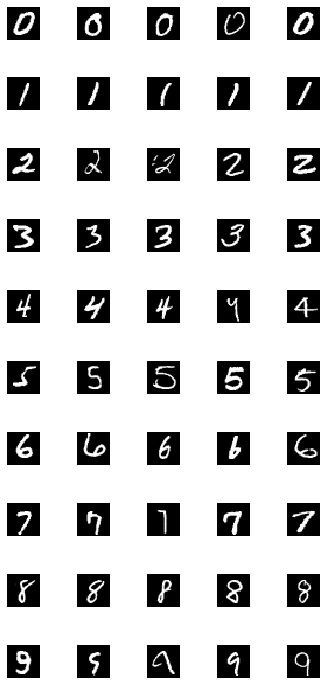

In [0]:
nrows=10
ncols=5

fig,axes=plt.subplots(nrows=nrows,ncols=ncols,figsize=(5,10))
fig.tight_layout()

for i in range(ncols):
  for j in range(nrows):
    selected_images=x_tr[y_tr==j]
    image=selected_images[random.randint(0,len(selected_images)-1),:,:]
    axes[j][i].imshow(image,cmap='gray')
    axes[j][i].axis('off')


In [0]:
n_pixels=28*28
x_tr=x_tr.reshape(x_tr.shape[0],n_pixels)
x_test=x_test.reshape(x_test.shape[0],n_pixels)


In [0]:
#scaling...
x_tr=x_tr/255
x_test=x_test/255

In [0]:
#one hot encode our y_tr
y_tr=to_categorical(y_tr,10)
y_test=to_categorical(y_test,10)



In [0]:
model=Sequential()
model.add(Dense(30,input_dim=n_pixels,activation='sigmoid'))
model.add(Dense(60,activation='sigmoid'))
model.add(Dense(120,activation='sigmoid'))
model.add(Dense(10,activation='softmax'))
model.compile(Adam(lr=1e-4),loss='categorical_crossentropy',metrics=['accuracy'])
print(model.summary())







Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 30)                23550     
_________________________________________________________________
dense_2 (Dense)              (None, 60)                1860      
_________________________________________________________________
dense_3 (Dense)              (None, 120)               7320      
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1210      
Total params: 33,940
Trainable params: 33,940
Non-trainable params: 0
_________________________________________________________________
None


In [0]:
h=model.fit(x_tr,y_tr,epochs=10,verbose=1,validation_data=(x_test,y_test))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 60000 samples, validate on 10000 samples
Epoch 1/10





60000/60000 [==============================] - 16s 272us/step - loss: 2.0465 - acc: 0.3634 - val_loss: 1.5686 - val_acc: 0.5961
Epoch 2/10
60000/60000 [==============================] - 7s 116us/step - loss: 1.1891 - acc: 0.6866 - val_loss: 0.8853 - val_acc: 0.7568
Epoch 3/10
60000/60000 [==============================] - 7s 118us/step - loss: 0.7593 - acc: 0.7847 - val_loss: 0.6544 - val_acc: 0.8153
Epoch 4/10
60000/60000 [==============================] - 7s 116us/step - loss: 0.6002 - acc: 0.8360 - val_loss: 0.5408 - val_acc: 0.8580
Epoch 5/10
60000/60000 [==============================] - 7s 117us/step - loss: 0.5064 - acc: 0.8652 - val_loss: 0.4646 - val_acc: 0.8785
Epoch 6/10
60000/60000 [==============================] - 7s 119us/step - loss: 0.4418 - acc: 0.8832 - val_loss: 0.4120 - val_acc: 0.8905
Epoch 7/10
60000/60

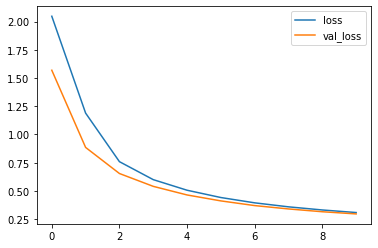

In [0]:
plt.plot(h.history['loss'],label='loss')
plt.plot(h.history['val_loss'],label='val_loss')
plt.legend()
plt.show()

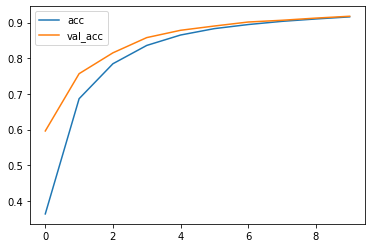

In [0]:
plt.plot(h.history['acc'],label='acc')
plt.plot(h.history['val_acc'],label='val_acc')
plt.legend()
plt.show()

In [0]:
#model.save('Mnist.h5')

In [0]:
#from google.colab import files
#files.download('Mnist.h5')

MessageError: ignored

In [0]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving p3.jpg to p3.jpg
User uploaded file "p3.jpg" with length 3899 bytes


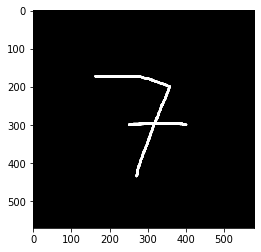

In [0]:
img=cv2.imread('p3.jpg')

plt.imshow(img,cmap='gray')
plt.show()

In [0]:
def preprocess(img):
  img=cv2.resize(img,(28,28))
  img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
  img=img.reshape(1,784)
  img=img/255
  return img

In [0]:
img=preprocess(img)

In [0]:
model.predict_classes(img)

array([7])